# Praktikum - 2 Data Mining

Nama : Alif As'ad Ramadhan

NRP  : 5054231007

Dataset : https://www.kaggle.com/competitions/praktikum-2-data-mining-rka/overview

## Prepare Tools

In [1327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [1328]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [1329]:
train.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector,Affected_by_Covid
0,1,0,8.605141,4.759242,0,Low,0,0,1,0,1,0,0,Education,1
1,0,1,8.487654,5.785164,1,High,0,1,0,1,1,0,0,Education,1
2,1,1,7.782498,5.067122,0,High,1,0,1,1,1,0,1,IT,1
3,0,1,6.691559,2.132398,0,Medium,1,1,0,0,0,1,1,Education,1
4,0,1,9.573909,3.102280,0,Medium,0,0,1,0,1,0,1,Healthcare,1


In [1330]:
test.head()

,id,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Team_Collaboration_Challenges,Sector,Affected_by_Covid
0,0,1,0,5.247558,5.115803,0,Medium,0,0,0,0,0,1,Education,1
1,1,1,1,6.997542,2.734942,0,Medium,0,1,1,0,1,1,Retail,1
2,2,1,1,9.822525,5.938610,1,Medium,0,0,0,0,1,0,Retail,1
3,3,0,1,6.233112,4.218354,0,Medium,1,0,0,0,1,1,Education,1
4,4,1,1,8.689261,3.532147,0,Medium,1,0,0,0,1,0,Education,1


## Clearing Dataset

In [1332]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Increased_Work_Hours           8000 non-null   int64  
 1   Work_From_Home                 8000 non-null   int64  
 2   Hours_Worked_Per_Day           8000 non-null   float64
 3   Meetings_Per_Day               8000 non-null   float64
 4   Productivity_Change            8000 non-null   int64  
 5   Stress_Level                   8000 non-null   object 
 6   Health_Issue                   8000 non-null   int64  
 7   Job_Security                   8000 non-null   int64  
 8   Childcare_Responsibilities     8000 non-null   int64  
 9   Commuting_Changes              8000 non-null   int64  
 10  Technology_Adaptation          8000 non-null   int64  
 11  Salary_Changes                 8000 non-null   int64  
 12  Team_Collaboration_Challenges  8000 non-null   i

In [1333]:
train.nunique()

Increased_Work_Hours                2
Work_From_Home                      2
Hours_Worked_Per_Day             8000
Meetings_Per_Day                 8000
Productivity_Change                 2
Stress_Level                        3
Health_Issue                        2
Job_Security                        2
Childcare_Responsibilities          2
Commuting_Changes                   2
Technology_Adaptation               2
Salary_Changes                      2
Team_Collaboration_Challenges       2
Sector                              4
Affected_by_Covid                   1
dtype: int64

Kita bisa lihat bahwa kolom `Affected_by_Covid` hanya memiliki satu unique value, hal tersebut tidak akan mendukung model untuk mendapatkan pola, sehingga kita bisa menghapusnya

In [1335]:
train.drop('Affected_by_Covid', axis=1, inplace=True)
test.drop(['id','Affected_by_Covid'], axis=1, inplace=True)

In [1336]:
train.isna().sum()

Increased_Work_Hours             0
Work_From_Home                   0
Hours_Worked_Per_Day             0
Meetings_Per_Day                 0
Productivity_Change              0
Stress_Level                     0
Health_Issue                     0
Job_Security                     0
Childcare_Responsibilities       0
Commuting_Changes                0
Technology_Adaptation            0
Salary_Changes                   0
Team_Collaboration_Challenges    0
Sector                           0
dtype: int64

In [1337]:
test.isna().sum()

Increased_Work_Hours             0
Work_From_Home                   0
Hours_Worked_Per_Day             0
Meetings_Per_Day                 0
Productivity_Change              0
Stress_Level                     0
Health_Issue                     0
Job_Security                     0
Childcare_Responsibilities       0
Commuting_Changes                0
Technology_Adaptation            0
Team_Collaboration_Challenges    0
Sector                           0
dtype: int64

Tidak ada `Missing values` data sudah aman

## EDA

Lihat distribusi data pada dataset `train` menggunakan `countplot`

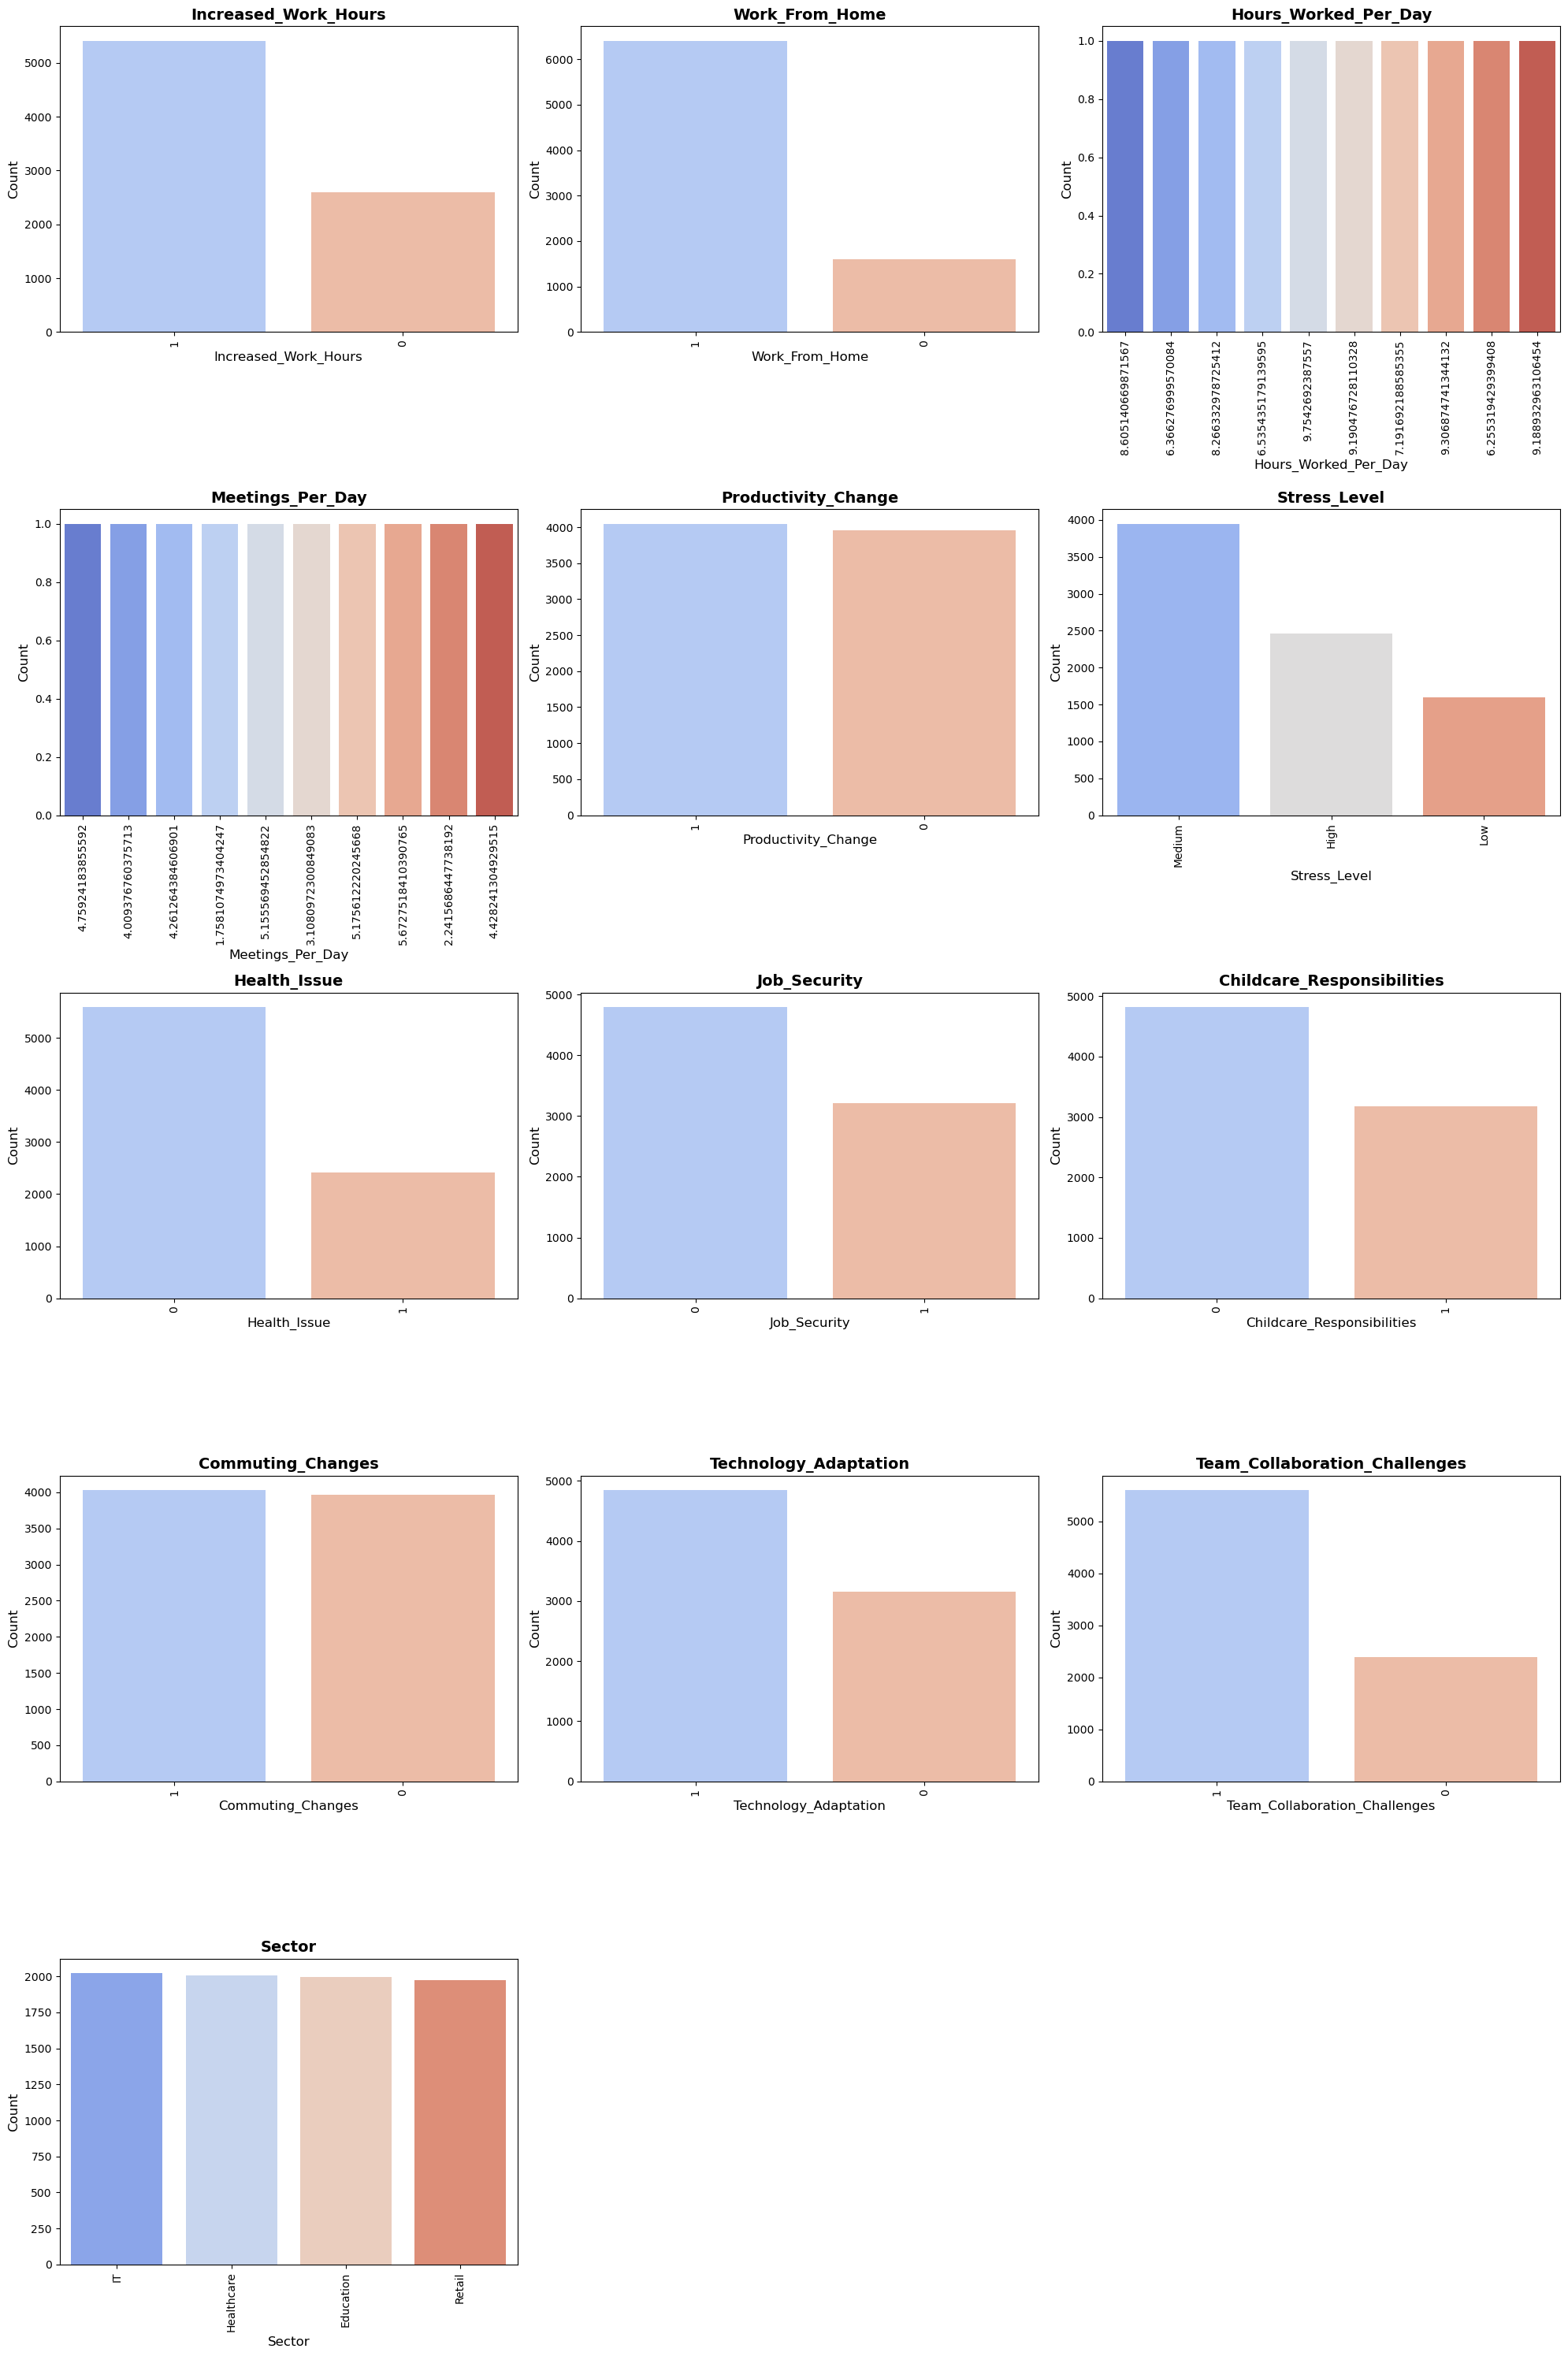

In [1341]:
import warnings
# Menonaktifkan warning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Daftar kolom kategorikal yang ingin dibuat plot
columns_to_plot = [
    'Increased_Work_Hours', 'Work_From_Home', 'Hours_Worked_Per_Day', 
    'Meetings_Per_Day', 'Productivity_Change', 'Stress_Level', 
    'Health_Issue', 'Job_Security', 'Childcare_Responsibilities', 
    'Commuting_Changes', 'Technology_Adaptation', 
    'Team_Collaboration_Challenges', 'Sector'
]

# Definisi jumlah kolom dan baris
n_cols = 3
n_rows = (len(columns_to_plot) // n_cols) + 1

# Mengatur ukuran figure
plt.figure(figsize=(20, n_rows * 6))

# Membuat countplot untuk setiap kolom kategorikal dalam train
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Mengambil 10 nilai teratas dari kolom
    top_10_items = train[column].value_counts().nlargest(10).index
    
    # Memfilter data hanya dengan nilai-nilai yang ada dalam top 10
    filtered_df = train[train[column].isin(top_10_items)]
    
    # Membuat countplot
    sns.countplot(data=filtered_df, x=column, palette='coolwarm', order=top_10_items)
    plt.title(column, fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Mengatur rotasi label x jika jumlah kategori terlalu banyak
    plt.xticks(rotation=90)

# Mengatur layout agar tidak overlapping
plt.tight_layout()
plt.show()

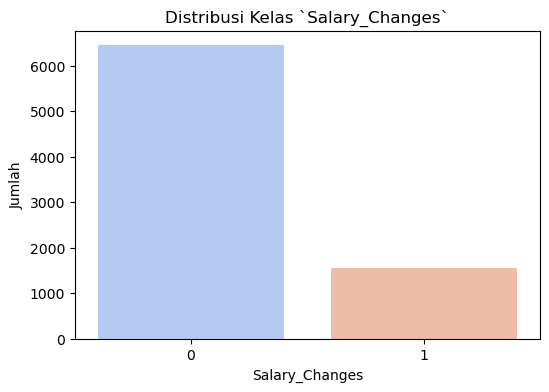

In [1342]:
# Visualisasi Target `Salary_Changes`
plt.figure(figsize=(6, 4))
sns.countplot(x=train.Salary_Changes, palette='coolwarm')
plt.title('Distribusi Kelas `Salary_Changes`')
plt.xlabel('Salary_Changes')
plt.ylabel('Jumlah')
plt.show()

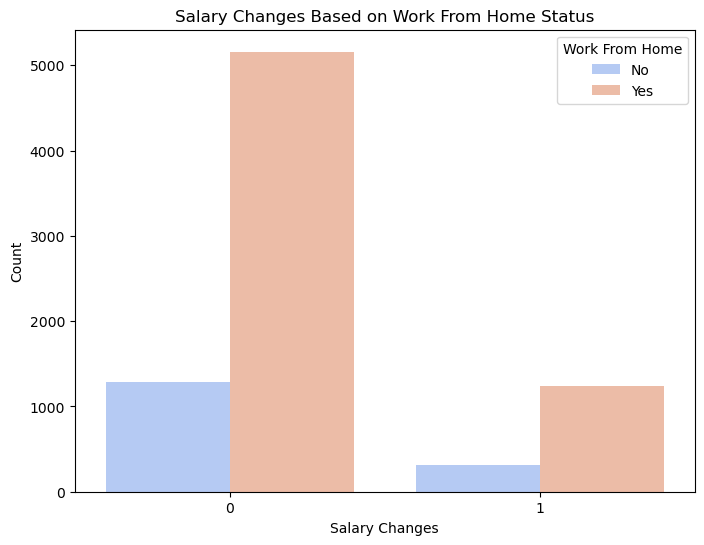

In [1343]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Salary_Changes', hue='Work_From_Home', data=train, palette='coolwarm')
plt.title("Salary Changes Based on Work From Home Status")
plt.xlabel("Salary Changes")
plt.ylabel("Count")
plt.legend(title="Work From Home", labels=["No", "Yes"])
plt.show()

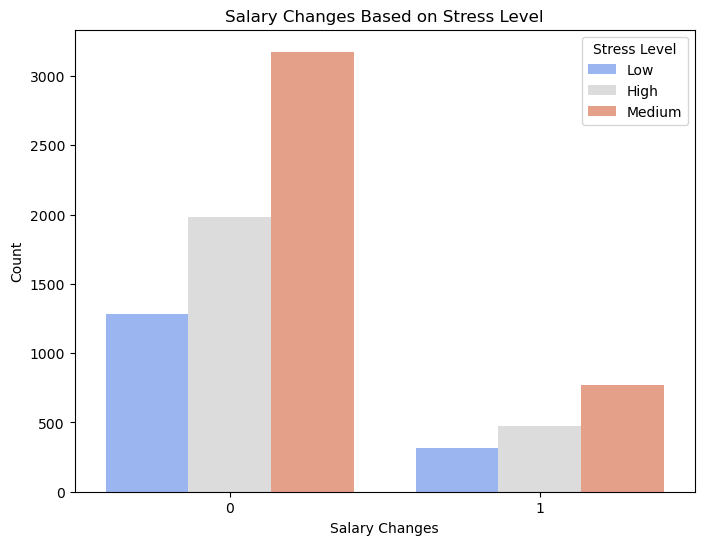

In [1344]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Salary_Changes', hue='Stress_Level', data=train, palette='coolwarm')
plt.title("Salary Changes Based on Stress Level")
plt.xlabel("Salary Changes")
plt.ylabel("Count")
plt.legend(title="Stress Level")
plt.show()

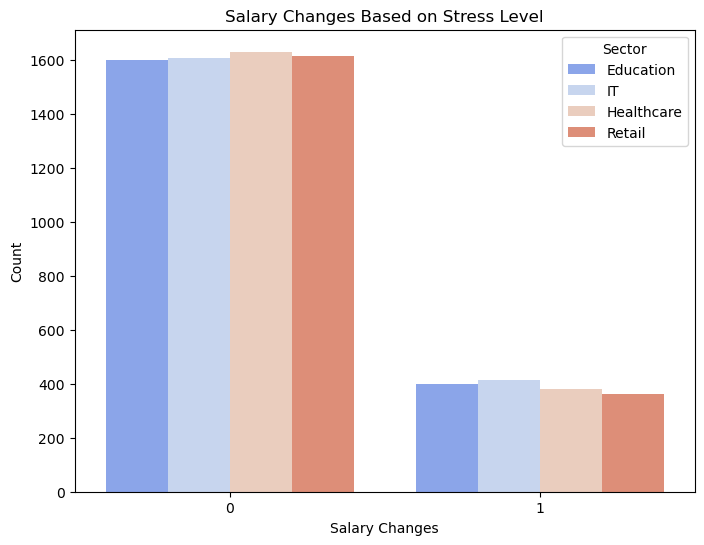

In [1345]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Salary_Changes', hue='Sector', data=train, palette='coolwarm')
plt.title("Salary Changes Based on Stress Level")
plt.xlabel("Salary Changes")
plt.ylabel("Count")
plt.legend(title="Sector")
plt.show()

## Preprocessing

Convert data kategorikal menjadi numerik

menggunakan ordinal encoding pada kolom `stress_level` karena unique value hanya sedikit, dan `low,` `medium,` dan `high` memiliki urutan yang alami `(low < medium < high)` sehingga ordinal sangat cocok untuk kasus ini

In [1348]:
from sklearn.preprocessing import OrdinalEncoder

# Menginisialisasi OrdinalEncoder dengan urutan kategori yang diinginkan
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])

# Melakukan transformasi dan langsung menyimpannya di kolom 'Stress_Level' pada dataset
train['Stress_Level'] = ordinal_encoder.fit_transform(train[['Stress_Level']])

# Menampilkan dataset train untuk memeriksa perubahan
train.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector
0,1,0,8.605141,4.759242,0,0.0,0,0,1,0,1,0,0,Education
1,0,1,8.487654,5.785164,1,2.0,0,1,0,1,1,0,0,Education
2,1,1,7.782498,5.067122,0,2.0,1,0,1,1,1,0,1,IT
3,0,1,6.691559,2.132398,0,1.0,1,1,0,0,0,1,1,Education
4,0,1,9.573909,3.102280,0,1.0,0,0,1,0,1,0,1,Healthcare


In [1349]:
# Lakukan Hal yang sama pada data `test`
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])

test['Stress_Level'] = ordinal_encoder.fit_transform(test[['Stress_Level']])

test.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Team_Collaboration_Challenges,Sector
0,1,0,5.247558,5.115803,0,1.0,0,0,0,0,0,1,Education
1,1,1,6.997542,2.734942,0,1.0,0,1,1,0,1,1,Retail
2,1,1,9.822525,5.938610,1,1.0,0,0,0,0,1,0,Retail
3,0,1,6.233112,4.218354,0,1.0,1,0,0,0,1,1,Education
4,1,1,8.689261,3.532147,0,1.0,1,0,0,0,1,0,Education


Menggunakan **`OneHotEncoder`** untuk mengkonversi kolom `Sector`

Kolom `Sector` memiliki nilai kategori yang tidak memiliki urutan atau hierarki (nominal). Jadi, tidak bisa mengonversi sektor-sektor ini menjadi angka (seperti 1, 2, 3, 4) tanpa menimbulkan interpretasi yang salah. Jika kita memberikan angka untuk setiap kategori, model bisa secara keliru menganggap adanya hubungan ordinal antara sektor-sektor tersebut (misalnya, mengira `Healthcare` lebih besar atau lebih kecil dari `Education`).

In [1351]:
# Melakukan One-Hot Encoding pada kolom 'Sector' dan menyimpan hasilnya ke dalam dataset train
train = pd.get_dummies(train, columns=['Sector'], drop_first=False)

# Mengonversi tipe data dari boolean ke integer (1/0) untuk kolom hasil One-Hot Encoding
train[['Sector_Education', 'Sector_Healthcare', 'Sector_IT', 'Sector_Retail']] = train[['Sector_Education', 'Sector_Healthcare', 'Sector_IT', 'Sector_Retail']].astype(int)

# Menampilkan hasil
train.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector_Education,Sector_Healthcare,Sector_IT,Sector_Retail
0,1,0,8.605141,4.759242,0,0.0,0,0,1,0,1,0,0,1,0,0,0
1,0,1,8.487654,5.785164,1,2.0,0,1,0,1,1,0,0,1,0,0,0
2,1,1,7.782498,5.067122,0,2.0,1,0,1,1,1,0,1,0,0,1,0
3,0,1,6.691559,2.132398,0,1.0,1,1,0,0,0,1,1,1,0,0,0
4,0,1,9.573909,3.102280,0,1.0,0,0,1,0,1,0,1,0,1,0,0


In [1352]:
# Lakukan Hal yang sama pada data test
test = pd.get_dummies(test, columns=['Sector'], drop_first=False)

test[['Sector_Education', 'Sector_Healthcare', 'Sector_IT', 'Sector_Retail']] = test[['Sector_Education', 'Sector_Healthcare', 'Sector_IT', 'Sector_Retail']].astype(int)

test.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Team_Collaboration_Challenges,Sector_Education,Sector_Healthcare,Sector_IT,Sector_Retail
0,1,0,5.247558,5.115803,0,1.0,0,0,0,0,0,1,1,0,0,0
1,1,1,6.997542,2.734942,0,1.0,0,1,1,0,1,1,0,0,0,1
2,1,1,9.822525,5.938610,1,1.0,0,0,0,0,1,0,0,0,0,1
3,0,1,6.233112,4.218354,0,1.0,1,0,0,0,1,1,1,0,0,0
4,1,1,8.689261,3.532147,0,1.0,1,0,0,0,1,0,1,0,0,0


## Modelling

In [1354]:
from sklearn.model_selection import train_test_split

X = train.drop(['Salary_Changes'], axis=1)
y = train['Salary_Changes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

col_xtrain = X_train.columns
col_xtest = X_test.columns

Karena kita tau bahwa data target kita `Imbalance` jadi `SMOTE` merupakan salah satu cara ampuh untuk mengatasinya

In [1356]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# Menggunakan SMOTE untuk oversampling pada data latih
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

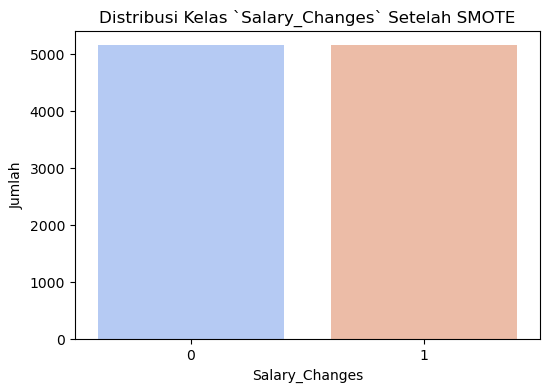

In [1357]:
# Visualisasi Setelah SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_smote, palette='coolwarm')
plt.title('Distribusi Kelas `Salary_Changes` Setelah SMOTE')
plt.xlabel('Salary_Changes')
plt.ylabel('Jumlah')
plt.show()

**Apa itu SMOTE??**

**`SMOTE`** atau **`Synthetic Minority Over-sampling Technique`** adalah teknik pemrosesan data yang digunakan untuk menyeimbangkan dataset yang mengalami ketidakseimbangan kelas (class imbalance). Ketika model dilatih pada dataset yang tidak seimbang, ia cenderung mengabaikan kelas minoritas karena lebih banyak sampel dari kelas mayoritas. SMOTE mengatasi masalah ini dengan menciptakan sampel sintetik dari kelas minoritas sehingga jumlahnya seimbang dengan kelas mayoritas.

### Kelebihan SMOTE

- **Efektif pada Dataset dengan Ketidakseimbangan yang Tinggi:** SMOTE menghasilkan sampel baru berdasarkan informasi dari tetangga terdekat, sehingga
lebih efektif daripada metode penyeimbangan lain, seperti undersampling, yang dapat kehilangan data mayoritas.

- **Mengurangi Overfitting dari Duplikasi Data:** SMOTE mengurangi kemungkinan overfitting yang terjadi karena penyalinan data kelas minoritas berulang kali.

- **Kesesuaian untuk Algoritma Berbasis Pembelajaran Statistik:** Algoritma seperti Random Forest dan Gradient Boosting cenderung lebih cocok bekerja dengan dataset yang seimbang, dan SMOTE dapat memberikan dataset yang lebih bervariasi dibanding metode lain seperti random oversampling.

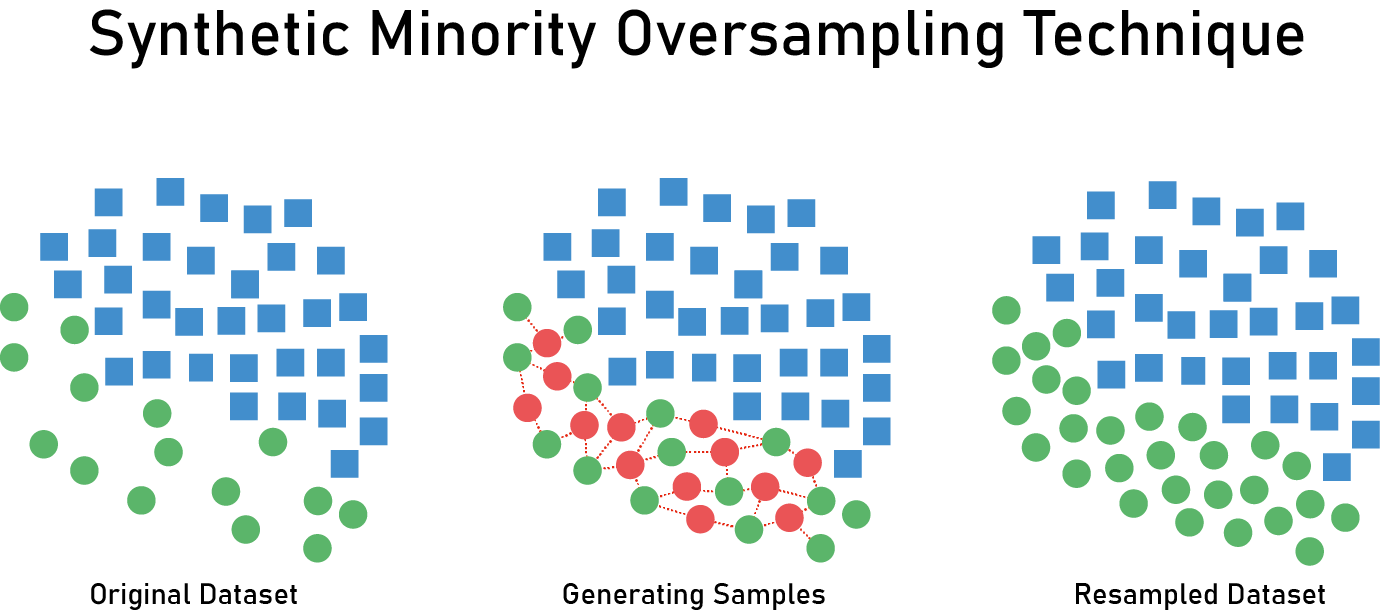

## Langkah-langkah Algoritma SMOTE

1. Menetapkan set kelas minoritas A. Untuk setiap 
x∈A, tetangga terdekat 
k dari 
x diperoleh dengan menghitung jarak Euclidean antara 
x dan setiap sampel lainnya dalam set A.

2. Mengatur laju pengambilan sampel N sesuai dengan proporsi ketidakseimbangan. Untuk setiap  x∈A, N contoh (yaitu 
𝑥
1
,
𝑥
2
,
…
,
𝑥
𝑛
 ) dipilih secara acak dari tetangga terdekat 
𝑘,dan mereka membentuk set 𝐴1

3. Untuk setiap contoh 
𝑥
𝑘
∈
𝐴
1​ (dengan 
k=1,2,3,…,N), rumus berikut digunakan untuk menghasilkan contoh baru:

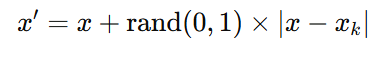

### Melakukan Scaling pada data `train` dan `test`

In [1364]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

X_trainscaled = scaler.fit_transform(X_train_smote)

X_testscaled = scaler.transform(X_test)

In [1365]:
X_train_scaled = pd.DataFrame(data=X_trainscaled, columns=col_xtrain)
X_test_scaled = pd.DataFrame(data=X_testscaled, columns=col_xtest)

In [1366]:
X_train_scaled.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Team_Collaboration_Challenges,Sector_Education,Sector_Healthcare,Sector_IT,Sector_Retail
0,0.726503,-1.853832,-0.310986,-0.017242,-0.930755,-0.162872,1.696262,1.339456,-0.744051,1.084303,-1.172997,0.703095,-0.562328,1.821452,-0.574884,-0.532371
1,0.726503,0.539423,0.383142,-1.207827,-0.930755,-1.633246,-0.589532,-0.746572,-0.744051,1.084303,0.852517,-1.422282,-0.562328,-0.549013,1.739480,-0.532371
2,0.726503,0.539423,-1.471502,-0.895535,-0.930755,-0.162872,-0.589532,-0.746572,-0.744051,1.084303,-1.172997,0.703095,-0.562328,1.821452,-0.574884,-0.532371
3,0.726503,0.539423,-0.106945,-0.336169,-0.930755,1.307502,-0.589532,-0.746572,-0.744051,1.084303,-1.172997,0.703095,-0.562328,1.821452,-0.574884,-0.532371
4,0.726503,0.539423,0.500008,0.071526,1.074397,-1.633246,-0.589532,-0.746572,-0.744051,1.084303,-1.172997,0.703095,1.778321,-0.549013,-0.574884,-0.532371


In [1367]:
# Lakukan juga pada data test
col_test = test.columns

test = scaler.fit_transform(test)
test_scaled = pd.DataFrame(data=test, columns=col_test)

In [1368]:
test_scaled.head()

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Team_Collaboration_Challenges,Sector_Education,Sector_Healthcare,Sector_IT,Sector_Retail
0,0.686783,-2.095432,-1.413048,0.728106,-0.976281,-0.121705,-0.656213,-0.853586,-0.804641,-0.992032,-1.231147,0.651538,1.762605,-0.569652,-0.59583,-0.576580
1,0.686783,0.477229,-0.515498,-0.827677,-0.976281,-0.121705,-0.656213,1.171529,1.242791,-0.992032,0.812251,0.651538,-0.567342,-0.569652,-0.59583,1.734363
2,0.686783,0.477229,0.933407,1.265773,1.024295,-0.121705,-0.656213,-0.853586,-0.804641,-0.992032,0.812251,-1.534831,-0.567342,-0.569652,-0.59583,1.734363
3,-1.456065,0.477229,-0.907567,0.141665,-0.976281,-0.121705,1.523896,-0.853586,-0.804641,-0.992032,0.812251,0.651538,1.762605,-0.569652,-0.59583,-0.576580
4,0.686783,0.477229,0.352168,-0.306740,-0.976281,-0.121705,1.523896,-0.853586,-0.804641,-0.992032,0.812251,-1.534831,1.762605,-0.569652,-0.59583,-0.576580


## Model Evaluation

In [1370]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

models = {"Random Forest": RandomForestClassifier(),
          "Xgb": XGBClassifier(),
          "Catboost": CatBoostClassifier(),
          "Adaboost": AdaBoostClassifier()}

# membuat fungsi untuk memasukan model dan scoring
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [1371]:
model_scores = fit_and_score(models=models,
                             X_train=X_train_scaled,
                             X_test=X_test_scaled,
                             y_train=y_train_smote,
                             y_test=y_test)

model_scores

Learning rate set to 0.02789
0:	learn: 0.6881017	total: 7.92ms	remaining: 7.91s
1:	learn: 0.6863865	total: 15.5ms	remaining: 7.73s
2:	learn: 0.6821709	total: 24ms	remaining: 7.97s
3:	learn: 0.6782340	total: 31.9ms	remaining: 7.95s
4:	learn: 0.6736168	total: 39.5ms	remaining: 7.86s
5:	learn: 0.6721992	total: 46.8ms	remaining: 7.75s
6:	learn: 0.6678398	total: 54.6ms	remaining: 7.75s
7:	learn: 0.6664082	total: 62.7ms	remaining: 7.78s
8:	learn: 0.6626150	total: 69.9ms	remaining: 7.7s
9:	learn: 0.6589819	total: 76.3ms	remaining: 7.55s
10:	learn: 0.6554359	total: 82.9ms	remaining: 7.46s
11:	learn: 0.6527129	total: 89.3ms	remaining: 7.35s
12:	learn: 0.6496964	total: 95.5ms	remaining: 7.25s
13:	learn: 0.6470813	total: 102ms	remaining: 7.18s
14:	learn: 0.6444746	total: 108ms	remaining: 7.12s
15:	learn: 0.6392488	total: 114ms	remaining: 7.03s
16:	learn: 0.6347193	total: 120ms	remaining: 6.97s
17:	learn: 0.6337300	total: 126ms	remaining: 6.89s
18:	learn: 0.6326225	total: 132ms	remaining: 6.83s
19

{'Random Forest': 0.719375,
 'Xgb': 0.69375,
 'Catboost': 0.6975,
 'Adaboost': 0.656875}

In [1372]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [1373]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# membuat fungsi untuk bahan evaluasi model
def show_scores_with_mse(model):
    train_preds = model.predict(X_train_scaled)
    val_preds = model.predict(X_test_scaled)
    scores = {
        "Training MAE": mean_absolute_error(y_train_smote, train_preds),
        "Valid MAE": mean_absolute_error(y_test, val_preds),
        "Training R^2": model.score(X_train_scaled, y_train_smote),
        "Valid R^2": model.score(X_test_scaled, y_test),
        "Training MSE": mean_squared_error(y_train_smote, train_preds),
        "Valid MSE": mean_squared_error(y_test, val_preds)
    }
    return scores

In [1374]:
show_scores_with_mse(model)

{'Training MAE': 0.46825859056493885,
 'Valid MAE': 0.33375,
 'Training R^2': 0.5317414094350612,
 'Valid R^2': 0.66625,
 'Training MSE': 0.46825859056493885,
 'Valid MSE': 0.33375}

In [1375]:
from sklearn.metrics import confusion_matrix, classification_report

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menampilkan laporan klasifikasi (Classification Report)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1296
           1       0.18      0.13      0.15       304

    accuracy                           0.72      1600
   macro avg       0.49      0.49      0.49      1600
weighted avg       0.69      0.72      0.70      1600



## Submit ke kaggle

In [1377]:
pred = model.predict(test_scaled)

sub['Salary_Changes'] = pred
sub.head()

,id,Salary_Changes
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0


In [1378]:
sub.to_csv('Sub6.csv',index = False)

# Terimakasih ^^